### *Creating the Eight Emotions Sets of Plutchik’s Wheel*

*I created the eight emotions sets of Plutchik’s Wheel using an English-English dictionary containing a large number of words with their explanations. Plutchik’s Wheel's primary emotions are joy, trust, fear, surprise, sadness, disgust, anger, and anticipation.*

*First, I built a dictionary, taking the words as 'key' and their numbers as 'value', and I included the words of the explanation of the first emotion with their numbers. After that, I expanded the dictionary by adding the words of the explanation of each 'key' in the dictionary. I can control the repetition of the process by the depth of the function I made. When the program encounters repeated words, it increases the 'value' according to their number.*

In [1]:
# Import the modules required
import pandas as pd
import json
import operator
import requests
import regex as re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from string import digits
pd.options.display.max_colwidth = 280
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dictionary that will be used  to create the sets 
data = json.load(open(r"thesaurus.json"))

In [3]:
# Set a function taking out related words for a given word and putting them all into a dictionary

def find_related(input_string: str, dictionary: dict, depth: int = 1):
    if input_string not in dictionary:
        return
# I used 'source and target' since we can't make changes in the dictionary in Python while traversing over it
    source = {input_string: 1}
    target = {}

    for i in range(depth):
        for word1 in source:
            if word1 not in dictionary:
                continue

            # Find the related words
            description = dictionary[word1]
        
            for word in description:

                # Build dictionary from list
                if word not in target:
                    target[word] = 1
                else:
                    target[word] += 1

        source.clear()
        source = target.copy()

    return target

In [4]:
# Set a function sorting the emotion dictionaries in descending order, and adjusting their lengths to make them equivalent

def limit_of_set (emotion, depth, limit):
    
    set = find_related(emotion, data, depth)
    print('The length of', emotion, 'dictionary: ', len(set))
    order_set = dict( sorted(set.items(), key=operator.itemgetter(1), reverse=True))
    emotion_set = {}
    for key, value in order_set.items():
        if len(emotion_set) > limit:
            break
        emotion_set[key] = value
    print('The length of', emotion, 'dictionary after cutting: ', len(emotion_set))
        
    return emotion_set

***Call the function for all emotions***

In [5]:
joy = limit_of_set('joy', 4, 200)
# Store the dictionary in a json file:
with open('sets\\joy.json', 'w') as fp:
    json.dump(joy, fp)

trust = limit_of_set('trust', 3, 200)
with open('sets\\trust.json', 'w') as fp:
    json.dump(trust, fp)

fear = limit_of_set('fear', 5, 200)
with open('sets\\fear.json', 'w') as fp:
    json.dump(fear, fp)

surprise = limit_of_set('surprise', 5, 200)
with open('sets\\surprise.json', 'w') as fp:
    json.dump(surprise, fp)

sadness = limit_of_set('sadness', 4, 200)
with open('sets\\sadness.json', 'w') as fp:
    json.dump(sadness, fp)

disgust = limit_of_set('disgust', 4, 200)
with open('sets\\disgust.json', 'w') as fp:
    json.dump(disgust, fp)

anger = limit_of_set('anger', 4, 200)
with open('sets\\anger.json', 'w') as fp:
    json.dump(anger, fp)

anticipation = limit_of_set('anticipation', 5, 200)
with open('sets\\anticipation.json', 'w') as fp:
    json.dump(anticipation, fp)

The length of joy dictionary:  384
The length of joy dictionary after cutting:  201
The length of trust dictionary:  253
The length of trust dictionary after cutting:  201
The length of fear dictionary:  398
The length of fear dictionary after cutting:  201
The length of surprise dictionary:  409
The length of surprise dictionary after cutting:  201
The length of sadness dictionary:  338
The length of sadness dictionary after cutting:  201
The length of disgust dictionary:  206
The length of disgust dictionary after cutting:  201
The length of anger dictionary:  350
The length of anger dictionary after cutting:  201
The length of anticipation dictionary:  295
The length of anticipation dictionary after cutting:  201


In [6]:
# Print the first 10 keys of Joy dictionary
dict(list(joy.items())[:10])

{'transport': 17,
 'ecstasy': 17,
 'rapture': 16,
 'delight': 14,
 'enjoyment': 11,
 'joy': 11,
 'pleasure': 10,
 'preference': 10,
 'inclination': 10,
 'happiness': 9}

***Set a class applying Sentiment Analysis to Tweets by detecting intersections between each Tweet and emotion dictionaries***

In [7]:
class Feeling:
    joy_dic = json.load(open(f"sets\\joy.json"))
    trust_dic = json.load(open(f"sets\\trust.json"))
    fear_dic = json.load(open(f"sets\\fear.json"))
    surprise_dic = json.load(open(f"sets\\surprise.json"))
    sadness_dic = json.load(open(f"sets\\sadness.json"))
    disgust_dic = json.load(open(f"sets\\disgust.json"))
    anger_dic = json.load(open(f"sets\\anger.json"))
    anticipation_dic = json.load(open(f"sets\\anticipation.json"))
    
    def __init__(self, tweet):
        self.joy = 0
        self.trust = 0
        self.fear = 0
        self.surprise = 0
        self.sadness = 0
        self.disgust = 0
        self.anger = 0
        self.anticipation = 0

        self.words = []
        self.split(tweet)
        self.find_frequency()

    def split(self, tweet):
        res = ''.join([i for i in tweet if not i.isdigit()])
        self.words = re.sub(r'[^\w\s]', '', res.lower()).split()
        for word in self.words:
            if word in stopwords.words('english'):
                self.words.remove(word)
                continue

    def find_frequency(self):
        for word in self.words:
            self.joy += Feeling.joy_dic.get(word, 0)
            self.trust += Feeling.trust_dic.get(word, 0)
            self.fear += Feeling.fear_dic.get(word, 0)
            self.surprise += Feeling.surprise_dic.get(word, 0)
            self.sadness += Feeling.sadness_dic.get(word, 0)
            self.disgust += Feeling.disgust_dic.get(word, 0)
            self.anger += Feeling.anger_dic.get(word, 0)
            self.anticipation += Feeling.anticipation_dic.get(word, 0)
            
        self.joy /= len(self.words)
        self.trust /= len(self.words)
        self.fear /= len(self.words)
        self.surprise /= len(self.words)
        self.sadness /= len(self.words)
        self.disgust /= len(self.words)
        self.anger /= len(self.words)
        self.anticipation /= len(self.words)

***Now, import 30000 Tweets related to World Cup 2022 Using Snscrape Libray***

In [8]:
import snscrape.modules.twitter as sntwitter

# Creating list to append tweet data to
tweets_list = []

query = 'world cup 2022 lang:en since:2022-11-20 until:2022-12-31'
limit = 30000

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i > limit:
        break
    tweets_list.append([tweet.username, tweet.date, tweet.content])
    
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(tweets_list, columns=["User", "Date", "Tweet"])

Unavailable user in card on tweet 1608717538044841985
User 1267790331132731394 not found in user refs in card on tweet 1608717538044841985
Unavailable user in card on tweet 1608467405054820360
Unavailable user in card on tweet 1608467405054820360
User 363577315 not found in user refs in card on tweet 1608467405054820360
User 363577315 not found in user refs in card on tweet 1608467405054820360
Unavailable user in card on tweet 1608420915292807175
Unavailable user in card on tweet 1608420915292807175
User 41566187 not found in user refs in card on tweet 1608420915292807175
User 41566187 not found in user refs in card on tweet 1608420915292807175
Unavailable user in card on tweet 1608364724198211584
Unavailable user in card on tweet 1608364724198211584
User 1595609128453275648 not found in user refs in card on tweet 1608364724198211584
User 1595609128453275648 not found in user refs in card on tweet 1608364724198211584
Unavailable user in card on tweet 1608135587097374721
User 9909825574

Unavailable user in card on tweet 1605145811440078848
User 363577315 not found in user refs in card on tweet 1605145811440078848
User 363577315 not found in user refs in card on tweet 1605145811440078848
Unavailable user in card on tweet 1605145685510193153
Unavailable user in card on tweet 1605145685510193153
User 363577315 not found in user refs in card on tweet 1605145685510193153
User 363577315 not found in user refs in card on tweet 1605145685510193153
Unavailable user in card on tweet 1605104585571536896
Unavailable user in card on tweet 1605104585571536896
User 2850377451 not found in user refs in card on tweet 1605104585571536896
User 2850377451 not found in user refs in card on tweet 1605104585571536896
Unavailable user in card on tweet 1605089123832074241
User 1041604336160137216 not found in user refs in card on tweet 1605089123832074241
Unavailable user in card on tweet 1605063451746918405
User 1041604336160137216 not found in user refs in card on tweet 1605063451746918405


In [9]:
tweets_df

,User,Date,Tweet
0,wefightcharts,2022-12-30 23:59:06+00:00,YOUTUBE • VÍDEOS EM ALTA GLOBAL 🌎\n\n#17 (-7) - 'It’s Beginning To Look A Lot Like Christmas' (cover) by V of BTS\n\n#35 (-21) - [BTS Episode] FIFA World Cup 2022 Soundtrack 'Dreamers' MV Shoot Sketch\n\n(@BTS_twt)
1,S_Walker95,2022-12-30 23:58:20+00:00,2022.. Messi Wins the World Cup\n\nRonaldo signs for a Saudi Arabian team for Money 💰 \n\nMy goat 🐐 #Messi
2,Arwium1,2022-12-30 23:58:11+00:00,"@M1AM1PEL1CAN @football_muscIe @TimelineCR7 casually im from argentina and was alive when maradona won the world cup, please dont tell me that one from 1986 still hurts you, you might wanna catch up and start processing 2022"
3,MartynWilliams6,2022-12-30 23:56:22+00:00,"Fancy this Adidas FA Cymru 2022/23 Home Shirt from the 2022 FIFA World Cup costing 22 quid, well worth a bargain I'd say\n\n@adidas @adidasUK @adidasfootball @FAWales @FIFAWorldCup https://t.co/0bF7AntYyh"
4,Adeyhinqar,2022-12-30 23:56:22+00:00,"2022! What a time to be a Messi Stan.\n\nWe watched Messi lift the world cup putting an end to the GOAT debate, and at the same time see CR7 flop at the WC. We also got to see ""Mr Champions League"" leave Man U to sign for a club that isn't in even in the Asian champions leagu..."
...,...,...,...
29996,Basketball_SK,2022-12-19 06:51:33+00:00,NBA Twitter reacted to Messi winning the FIFA 2022 World Cup! 🐐🇦🇷\n\nDifferent sports. Same passion. 🏀🤝⚽\n\n#lionelmessi #fifaworldcup2022 #argentina #nba https://t.co/1QoC4lCu0U
29997,askbygeeks,2022-12-19 06:51:32+00:00,PUBG Mobile joins in celebrating Argentina and Lionel Messi’s 2022 World Cup victory https://t.co/BCeoFEBHTb
29998,ljkmis,2022-12-19 06:51:28+00:00,the way that seems so far away but that’s exactly what i said in 2018 abt the 2022 world cup and here i am … 🥲🥲🥲 im gonna cry time goes by so fast i am still a baby fuck everything
29999,fedregs,2022-12-19 06:51:14+00:00,Argentina Defeats France to Win 2022 World Cup Behind Lionel Messi in Shootout\n\n#Argentina #France #Win2022 #WorldCup #LionelMessi #Shootout #follow #trending #famous https://t.co/RJ3V2uKXFL


***Run the class and arrange the results in a DataFrame.***

In [10]:
# Create empty DataFrame with column names
df = pd.DataFrame(columns = ['Tweet', 'Joy', 'Trust', 'Fear', 'Surprise',
                             'Sadness', 'Disgust', 'Anger', 'Anticipation'])

# Fill the DataFrame with the result of each tweet row by row
for twt in tweets_df['Tweet']:
    tweet = Feeling(twt)
    df.loc[len(df)] = [twt, tweet.joy, tweet.trust, tweet.fear, tweet.surprise,
                       tweet.sadness, tweet.disgust, tweet.anger, tweet.anticipation]

# Add a row containing the mean of each emotion for all Tweets
df.loc['mean'] = df.mean()
df

,Tweet,Joy,Trust,Fear,Surprise,Sadness,Disgust,Anger,Anticipation
0,YOUTUBE • VÍDEOS EM ALTA GLOBAL 🌎\n\n#17 (-7) - 'It’s Beginning To Look A Lot Like Christmas' (cover) by V of BTS\n\n#35 (-21) - [BTS Episode] FIFA World Cup 2022 Soundtrack 'Dreamers' MV Shoot Sketch\n\n(@BTS_twt),0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2022.. Messi Wins the World Cup\n\nRonaldo signs for a Saudi Arabian team for Money 💰 \n\nMy goat 🐐 #Messi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"@M1AM1PEL1CAN @football_muscIe @TimelineCR7 casually im from argentina and was alive when maradona won the world cup, please dont tell me that one from 1986 still hurts you, you might wanna catch up and start processing 2022",0.000000,0.000000,0.192308,0.000000,0.000000,0.000000,0.000000,0.000000
3,"Fancy this Adidas FA Cymru 2022/23 Home Shirt from the 2022 FIFA World Cup costing 22 quid, well worth a bargain I'd say\n\n@adidas @adidasUK @adidasfootball @FAWales @FIFAWorldCup https://t.co/0bF7AntYyh",0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478
4,"2022! What a time to be a Messi Stan.\n\nWe watched Messi lift the world cup putting an end to the GOAT debate, and at the same time see CR7 flop at the WC. We also got to see ""Mr Champions League"" leave Man U to sign for a club that isn't in even in the Asian champions leagu...",0.121951,0.024390,0.048780,0.000000,0.000000,0.000000,0.000000,0.024390
...,...,...,...,...,...,...,...,...,...
29997,PUBG Mobile joins in celebrating Argentina and Lionel Messi’s 2022 World Cup victory https://t.co/BCeoFEBHTb,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29998,the way that seems so far away but that’s exactly what i said in 2018 abt the 2022 world cup and here i am … 🥲🥲🥲 im gonna cry time goes by so fast i am still a baby fuck everything,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29999,Argentina Defeats France to Win 2022 World Cup Behind Lionel Messi in Shootout\n\n#Argentina #France #Win2022 #WorldCup #LionelMessi #Shootout #follow #trending #famous https://t.co/RJ3V2uKXFL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30000,Super Eagles failure to qualify for 2022 World Cup lowest Moment of my life – Amaju Pinnick https://t.co/S2KiTW1aei,0.000000,0.000000,0.230769,0.000000,0.000000,0.000000,0.384615,0.000000


<AxesSubplot:title={'center':'The emotional distribution surrounding the World Cup 2022 based on 30000 tweets'}>

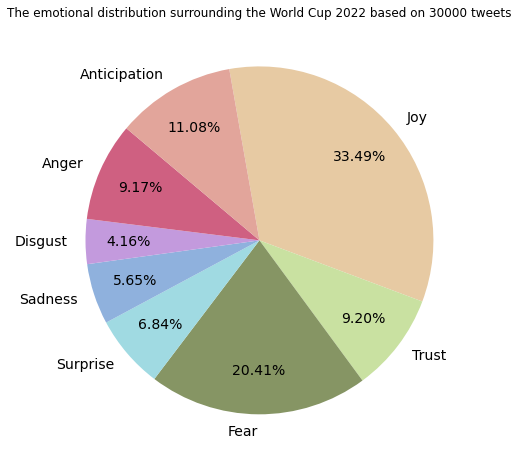

In [62]:
# Visualize the results in a pie chart
colors = ['#E7CAA3','#C9E1A1','#869564','#A0DAE2','#8FB1DD','#C39ADD','#CF6081','#E2A59B']
df.iloc[len(df)-1, 1:9].plot.pie(figsize=(8, 8),colors=colors, fontsize=14, autopct='%1.2f%%',
                                 startangle=100, counterclock=False, pctdistance=0.75, label="",
                                title = 'The emotional distribution surrounding the World Cup 2022 based on 30000 tweets')

### *Let's test the model on another topic, COVID-19 pandemic for example*

In [30]:
tweets_list1 = []

query = 'covid lang:en since:2019-11-17 until:2020-02-17'
limit = 30000

for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i > limit:
        break
    tweets_list1.append([tweet.username, tweet.date, tweet.content])
    
tweets_df1 = pd.DataFrame(tweets_list1, columns=["User", "Date", "Tweet"])

Unavailable user in card on tweet 1229189826345345025
User 218852667 not found in user refs in card on tweet 1229189826345345025
Unavailable user in card on tweet 1229049768195829760
Unavailable user in card on tweet 1229049768195829760
User 15843059 not found in user refs in card on tweet 1229049768195829760
User 15843059 not found in user refs in card on tweet 1229049768195829760
Empty user ref object in card on tweet 1228937155927519232
Empty user ref object in card on tweet 1228937155927519232
User 4503599629184530 not found in user refs in card on tweet 1228937155927519232
User 4503599629184530 not found in user refs in card on tweet 1228937155927519232
Unavailable user in card on tweet 1228895048525402112
Unavailable user in card on tweet 1228895048525402112
User 1630083736837521409 not found in user refs in card on tweet 1228895048525402112
User 1630083736837521409 not found in user refs in card on tweet 1228895048525402112
Unavailable user in card on tweet 1228872639806087168
U

In [31]:
tweets_df1

,User,Date,Tweet
0,reinterpreterdj,2020-02-16 23:59:42+00:00,Coronavirus (COVID-19): latest information and advice @GOVUK https://t.co/TfhL2Ut4EA
1,nopittie,2020-02-16 23:59:40+00:00,"@howroute I am not buying it. Besides, how many of the people lapping up the conspiracy theories about COVID-19 refuse to get the flu shot knowing it kills more than this? If a vaccination was made for COVID-19, would they get it? Doubtful 😒"
2,SuperCycleBear,2020-02-16 23:59:36+00:00,@ChrisWeston_PS WTF? Before any impact of covid 19? Hard to think this is business as usual anytime soon
3,PubTrend,2020-02-16 23:59:31+00:00,Trending on PubMed: Case of the Index Patient Who Caused Tertiary Transmission of COVID-19 Infection in Korea: the Application of Lopinavir/Ritonavir for the Treatment of COVID-19 Infected Pneumonia Monitored by Quantitative RT-PCR. https://t.co/x5OSRW2EdG
4,Conga1,2020-02-16 23:59:23+00:00,"As cruise ship COVID-19 numbers climb, nations evacuate passengers https://t.co/RmbC7ME90s via CIDRAP Center for Infectious Disease Research and Policy, Feb. 16, 2020"
...,...,...,...
29996,warriors_mom,2020-02-12 00:39:53+00:00,"US military approves 11 COVID-19 quarantine camps 'for up to 1,000 people' next to major US airports 😷 Daily Mail Online #Coronavirus #Health https://t.co/TyFSjjDXiB"
29997,biomedsphere,2020-02-12 00:39:52+00:00,#Coronavirus latest: WHO officially names disease COVID-19 https://t.co/M7pczaf5Z2
29998,23ABCNews,2020-02-12 00:39:20+00:00,Three mislabeled samples being tested for the #coronavirus (COVID-19) led to the mistaken release of a person who later tested positive for the illness in San Diego. https://t.co/r1tJrw1yWI
29999,arirangtvnews,2020-02-12 00:38:51+00:00,"▪""PUBLIC ENEMY NUMBER 1""\n\nWHO labels coronavirus 'COVID-19', declares it ""public enemy number 1"" https://t.co/xFp76NLw0M"


In [32]:
# Create empty DataFrame with column names
df1 = pd.DataFrame(columns = ['Tweet', 'Joy', 'Trust', 'Fear', 'Surprise',
                             'Sadness', 'Disgust', 'Anger', 'Anticipation'])

# Fill the DataFrame with the result of each tweet row by row
for twt in tweets_df1['Tweet']:
    tweet = Feeling(twt)
    df1.loc[len(df1)] = [twt, tweet.joy, tweet.trust, tweet.fear, tweet.surprise,
                       tweet.sadness, tweet.disgust, tweet.anger, tweet.anticipation]

# Add a row containing the mean of each emotion for all Tweets
df1.loc['mean'] = df1.mean()
df1

,Tweet,Joy,Trust,Fear,Surprise,Sadness,Disgust,Anger,Anticipation
0,Coronavirus (COVID-19): latest information and advice @GOVUK https://t.co/TfhL2Ut4EA,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,"@howroute I am not buying it. Besides, how many of the people lapping up the conspiracy theories about COVID-19 refuse to get the flu shot knowing it kills more than this? If a vaccination was made for COVID-19, would they get it? Doubtful 😒",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,@ChrisWeston_PS WTF? Before any impact of covid 19? Hard to think this is business as usual anytime soon,0.000000,0.25000,0.000000,0.000000,0.000000,0.083333,0.00000,0.250000
3,Trending on PubMed: Case of the Index Patient Who Caused Tertiary Transmission of COVID-19 Infection in Korea: the Application of Lopinavir/Ritonavir for the Treatment of COVID-19 Infected Pneumonia Monitored by Quantitative RT-PCR. https://t.co/x5OSRW2EdG,0.043478,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,"As cruise ship COVID-19 numbers climb, nations evacuate passengers https://t.co/RmbC7ME90s via CIDRAP Center for Infectious Disease Research and Policy, Feb. 16, 2020",0.000000,0.00000,0.000000,0.058824,0.117647,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...
29997,#Coronavirus latest: WHO officially names disease COVID-19 https://t.co/M7pczaf5Z2,0.000000,0.00000,0.000000,0.142857,0.285714,0.000000,0.00000,0.000000
29998,Three mislabeled samples being tested for the #coronavirus (COVID-19) led to the mistaken release of a person who later tested positive for the illness in San Diego. https://t.co/r1tJrw1yWI,0.000000,0.00000,0.000000,0.000000,0.047619,0.047619,0.00000,0.000000
29999,"▪""PUBLIC ENEMY NUMBER 1""\n\nWHO labels coronavirus 'COVID-19', declares it ""public enemy number 1"" https://t.co/xFp76NLw0M",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
30000,They finally named the deadly coronavirus sweeping through China: It's Covid-19 https://t.co/yG0kop39Nv,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


<AxesSubplot:title={'center':'The emotional distribution surrounding COVID-19 pandemic based on 30000 tweets'}>

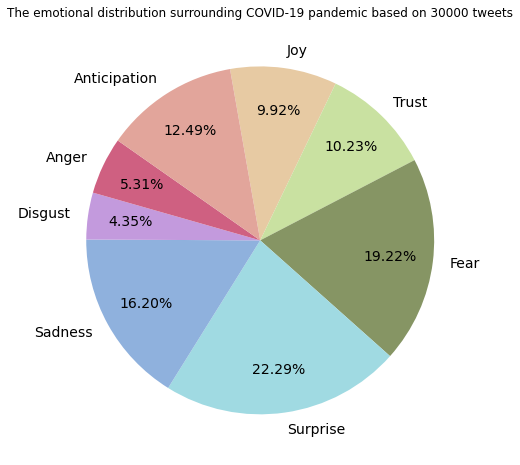

In [55]:
# Visualize the results in a pie chart
colors = ['#E7CAA3','#C9E1A1','#869564','#A0DAE2','#8FB1DD','#C39ADD','#CF6081','#E2A59B']
df1.iloc[len(df1)-1, 1:9].plot.pie(figsize=(8, 8),colors=colors, fontsize=14, autopct='%1.2f%%',
                                 startangle=100, counterclock=False, pctdistance=0.75, label="",
                                title = 'The emotional distribution surrounding COVID-19 pandemic based on 30000 tweets')